<a href="https://colab.research.google.com/github/darkey-junior/Hello_World/blob/master/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

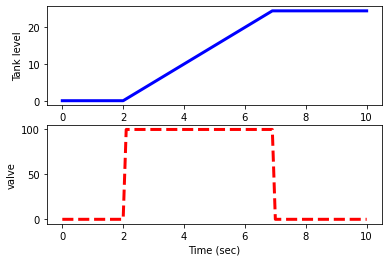

In [1]:
#Sample problem 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

def tank(level,time,c,valve):
  rho = 1000
  A = 1
  dlevel_dt = (c/(rho*A))*valve
  return dlevel_dt
ts = np.linspace(0,10,101)
c = 50
u = np.zeros(101)
u[21:70] = 100

level0 = 0
z = np.zeros(101)

for i in range(100):
  valve = u[i+1]
  y = odeint(tank,level0,[0,0.1],args = (c, valve)) 
  level0 = y[-1]
  z[i+1] = level0

plt.figure()
plt.subplot(2,1,1)
plt.plot(ts,z,'b-', linewidth=3)
plt.ylabel('Tank level')
plt.subplot(2,1,2)
plt.plot(ts,u,'r--', linewidth=3)
plt.ylabel('valve')
plt.xlabel('Time (sec)')
plt.show()

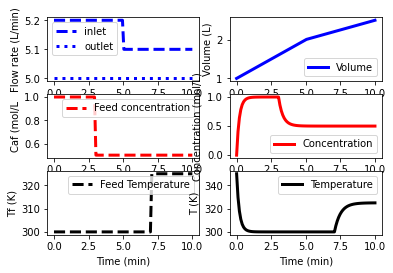

In [9]:
#Sample problem 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#define mixing model
def vessel(x,t,q,qf,Caf,Tf):
   #inputs(4)
   #qf inlet volumetric flowrate (L/min)
   #q outlet volumetric flowrate (L/min)
   #Caf feed concentration (mol/L)
   #Tf feed temperature(K)

   #states(3)
   #volume (L)
   V = x[0]

   #cocentration of A (mol/L)
   Ca = x[1]

   #Temperature (K)
   T = x[2]

   #Parameters
   #reaction rate 
   rA = 0.0

   #Mass balance: Volume derivative
   dVdt = qf - q

   #species balance: Concentration derivative
   dCadt = (qf*Caf - q*Ca)/V - rA - (Ca*dVdt/V)

   #Energy balance: temperature derivative 
   dTdt = (qf*Tf - q*T)/V - (T*dVdt/V)

   #return derivatives
   return [dVdt,dCadt,dTdt]

#Initial conditions 
VO = 1.0
CaO = 0.0
TO = 350.0
yO = [VO,CaO,TO]

#Time interval (min)
t = np.linspace (0,10,100)

#Inlet volumetric flowrate 
qf = np.ones(len(t))*5.2
qf[50:] = 5.1

#Outlet volumetric flowrate
q = np.ones(len(t))*5.0

#feed concetration
Caf = np.ones(len(t))*1.0
Caf[30:] = 0.5

#feed temperature 
Tf = np.ones(len(t))*300.0
Tf[70:] = 325.0

#Storage for results
V = np.ones(len(t))*VO
Ca = np.ones(len(t))*CaO
T = np.ones(len(t))*TO

#Loop through each time step
for i in range(len(t)-1):
  #simulate 
  inputs = (q[i],qf[i],Caf[i],Tf[i])
  ts = [t[i],t[i+1]]
  y = odeint(vessel,yO,ts,args=inputs)
 
  #store results 
  V[i+1] = y[-1][0]
  Ca[i+1] = y[-1][1]
  T[i+1] = y[-1][2]

  #Adjust initial condition for next loop
  yO = y[-1]

#Construct data file
data = np.vstack((t,qf,q,Tf,Caf,V,Ca,T))
data = data.T
np.savetxt('datatxt',data,delimiter=',')

#Plot the inputs and results
plt.figure()

plt.subplot(3,2,1)
plt.plot(t,qf,'b--', linewidth=3)
plt.plot(t,q,'b:', linewidth=3)
plt.ylabel('Flow rate (L/min)')
plt.legend(['inlet','outlet'], loc='best')

plt.subplot(3,2,3)
plt.plot(t,Caf,'r--', linewidth=3)
plt.ylabel('Caf (mol/L')
plt.legend(['Feed concentration'], loc='best')

plt.subplot(3,2,5)
plt.plot(t,Tf,'k--',linewidth=3)
plt.ylabel('Tf (K)')
plt.legend(['Feed Temperature'], loc='best')
plt.xlabel('Time (min)')

plt.subplot(3,2,2)
plt.plot(t,V,'b-', linewidth=3)
plt.ylabel('Volume (L)')
plt.legend(['Volume'], loc='best')

plt.subplot(3,2,4)
plt.plot(t,Ca,'r-', linewidth=3)
plt.ylabel('Concentration (mol/L)')
plt.legend(['Concentration'], loc='best')

plt.subplot(3,2,6)
plt.plot(t,T,'k-', linewidth=3)
plt.ylabel('T (K)')
plt.legend(['Temperature'], loc='best')
plt.xlabel('Time (min)')

plt.show()




